# Memprediksi Penjualan Rumah di King County, Washington State, USA

# Bussiness Understanding

Pada tahapan ini membutuhkan pengetahuan dari objek bisnis, dengan membangun atau mendapatkan data dan menyamakan tujuan pemodelan untuk tujuan bisnis sehingga model akan dibangun dengan baik. 
Tentang berkas ini :
Perusahaan properti online menawarkan penilaian rumah menggunakan teknik pembelajaran mesin. Tujuan dari laporan ini adalah untuk memprediksi penjualan rumah di King County, Washington State, USA menggunakan Linear Regression. Dataset terdiri dari data historis rumah yang dijual antara Mei 2014 hingga Mei 2015.
Kami akan memprediksi penjualan rumah di King County dengan akurasi setidaknya 75-80% dan memahami faktor mana yang bertanggung jawab atas nilai properti yang lebih tinggi - $650K ke atas.”

Dataset terdiri dari harga rumah dari King County sebuah area di Negara Bagian Washington AS, data ini juga mencakup Seattle. Dataset diperoleh dari Kaggle. Data ini diterbitkan/dirilis di bawah CC0: Domain Publik. 
link : https://www.kaggle.com/datasets/shivachandel/kc-house-data

# Data Understanding

Pada tahapan ini merupakan  dipakai untuk memeriksa data sehingga dapat mengidentifikasi masalah pada data yang kita dapatkan. Tahapan ini memberikan pondasi analitik untuk sebuah penelitian dengan membuat ringkasan (summary) dan mengidentifikasi potensi masalah dalam data.

Dataset terdiri dari 21 variabel dan 21613 observasi. 

 0.   id (Nomor identifikasi properti adalah nomor yang diberikan pada persil properti riil oleh penilai pajak      dari yurisdiksi tertentu untuk tujuan identifikasi dan penyimpanan catatan.) = int64  
 1.   date (Tanggal)   = object 
 2.   price (Harga)   = float64
 3.   bedrooms (Kamar tidur) = int64  
 4.   bathrooms (Kamar mandi) = float64
 5.   sqft_living (Ruang tamu) =     int64  
 6.   sqft_lot (Luas tanah) = int64  
 7.   floors (Jumlah lantai) = float64
 8.   waterfront (Menghadap tepi laut) = int64  
 9.   view (Tampilan rumah) = int64  
 10.  condition (Kondisi rumah) = int64  
 11.  grade (Tingkat kontruksi dan desain yang tinggi) = int64  
 12.  sqft_above (Interior tingkat atas) = int64  
 13.  sqft_basement (Interior tingkat bawah) = int64  
 14.  yr_built (Pertama kali rumah di bangun) = int64  
 15.  yr_renovated (Terakhir rumah di renovasi) = int64  
 16.  zipcode = int64  
 17.  lat (Latitudinal) = float64
 18.  long (Longitudinal) = float64
 19.  sqft_living15 (Luas hunian interior untuk 15 tetangga terdekat) = int64  
 20.  sqft_lot15 (Luas lahan untuk 15 tetangga terdekat) = int64 

 KETERANGAN :
 Dari 21 Variabel, tetapi untuk 3 variabel diantaranya Id, date (tanggal), Zipcode tidak digunakan.
 Sehingga hanya 18 Variabel yang digunakan.


# Deskripsi library yang digunakan

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load dataset
mengambil dan melihat konten dari 10 data pertama

In [35]:
df = pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## data understanding

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Heatmap menunjukkan nilai-nilai kosong dengan warna yang berbeda, sehingga memungkinkan kita untuk dengan mudah melihat pola kekosongan dalam dataset kita. Semakin gelap warna pada heatmap, semakin banyak nilai null pada kolom dan baris yang sesuai.

<Axes: >

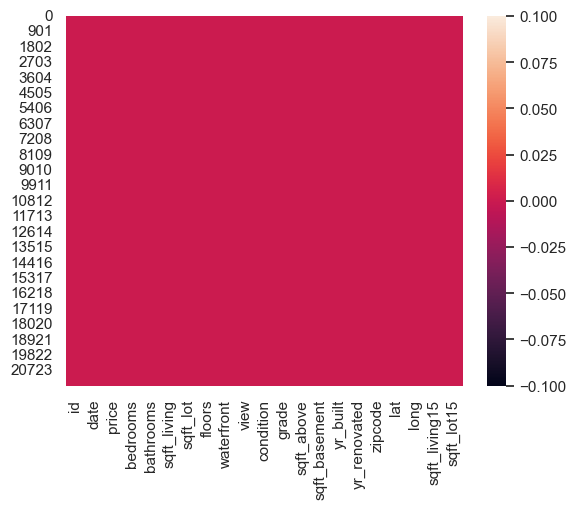

In [37]:
sns.heatmap(df.isnull())

df.describe() adalah sebuah method pada pandas DataFrame yang menghasilkan deskripsi statistik ringkas dari setiap kolom numerik pada DataFrame, termasuk rata-rata, standar deviasi, nilai minimum dan maksimum, kuartil, dll. Method ini sangat berguna untuk memahami data yang ada dan dapat digunakan sebagai langkah awal dalam menjelajahi dataset.

In [38]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


membuat sebuah figure baru dengan lebar 10 inch dan tinggi 8 inch. Ini berguna untuk membuat gambar dengan ukuran yang spesifik sehingga mudah dibaca dan dianalisis.

/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_2196/2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

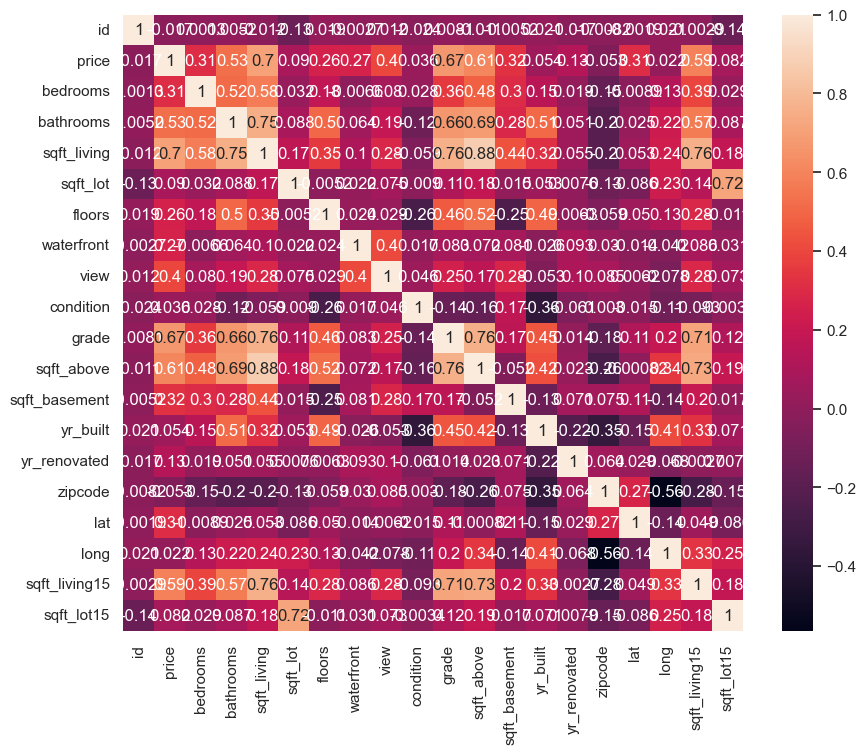

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

bisa melihat outlier diplot sebagai poin individu; ini mungkin adalah rumah yang lebih mahal.

dapat melihat bahwa harga cenderung naik ketika rumah memiliki lebih banyak kamar tidur

[Text(0.5, 0, 'Floors'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Floors vs Price Box Plot')]

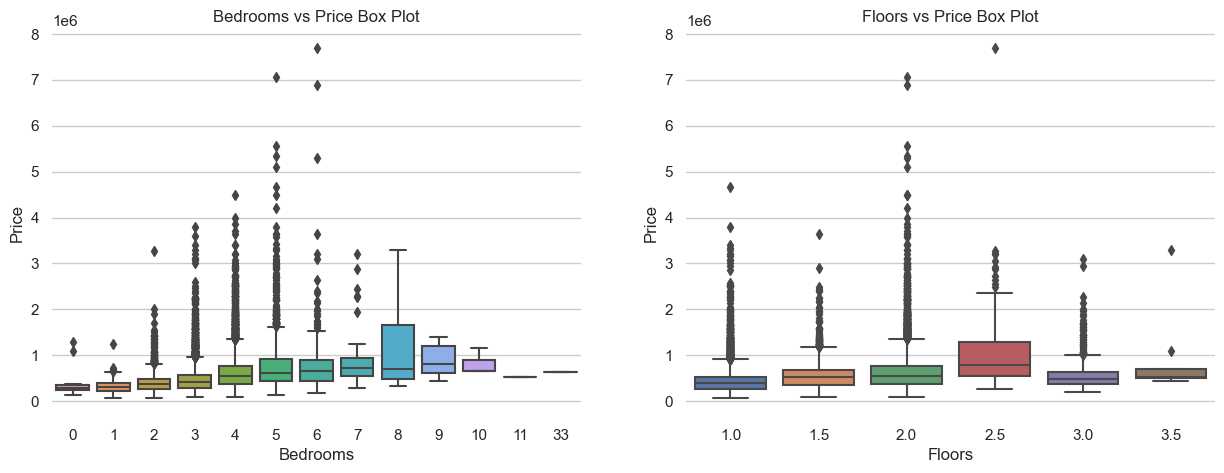

In [40]:
sns.set(style="whitegrid", font_scale=1)
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price Box Plot')

merekayasa fitur tanggal untuk membuat kolom tahun dan bulan. Tanggal fitur adalah sebagai string. Dengan pd.to_datetime memungkinkan dapat mengonversi argumen menjadi datetime.



In [41]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date',axis=1)

# Check the new columns
print(df.columns.values)


['id' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15' 'month' 'year']


Di lihat dari boxplot bahwa tidak ada perbedaan besar antara tahun 2014 dan 2015.



Jumlah rumah yang terjual per bulan cenderung sama setiap bulannya.

Lineplot menunjukkan bahwa sekitar bulan April terjadi kenaikan harga rumah.

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Price'), Text(0.5, 1.0, 'Price Trends')]

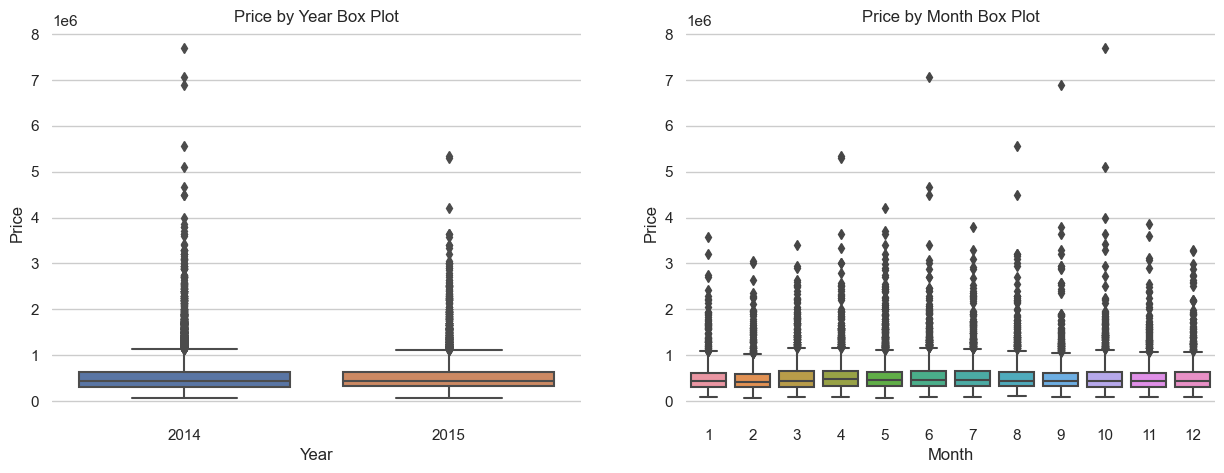

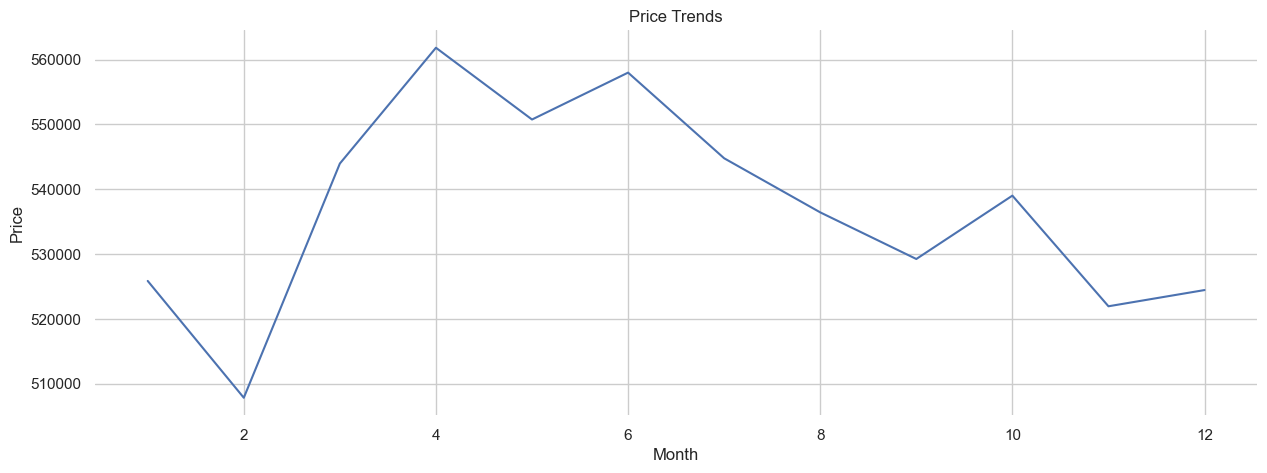

In [42]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x='year',y='price',data=df, ax=axes[0])
sns.boxplot(x='month',y='price',data=df, ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Year', ylabel='Price', title='Price by Year Box Plot')
axes[1].set(xlabel='Month', ylabel='Price', title='Price by Month Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
df.groupby('month').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Month', ylabel='Price', title='Price Trends')

Kode di bawah digunakan untuk membuat line plot dengan sumbu x adalah tahun dibangun properti (yr_built) dan sumbu y adalah harga properti (price).

<Axes: xlabel='yr_built', ylabel='price'>

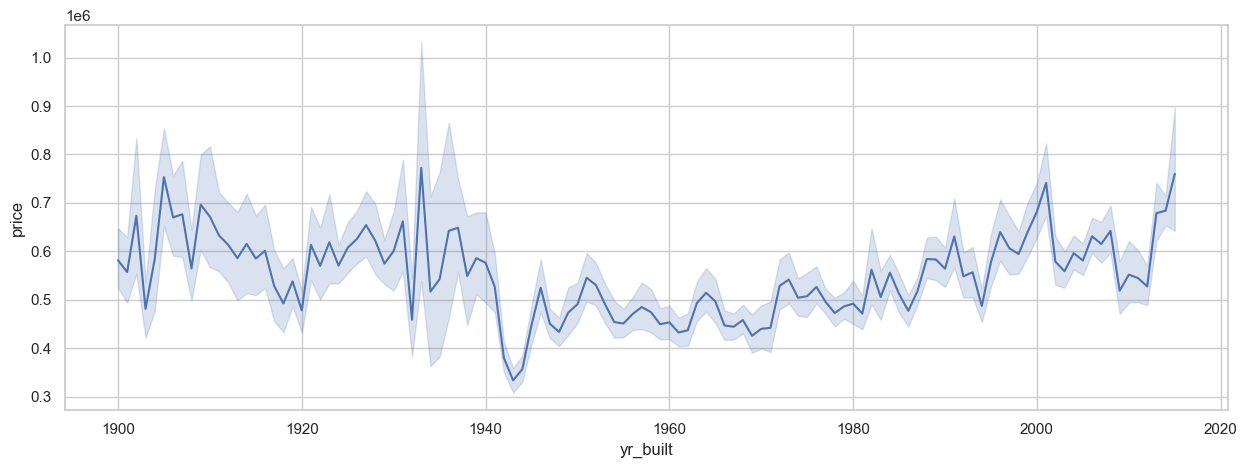

In [43]:
plt.figure(figsize=(15,5))
sns.lineplot(x='yr_built', y='price', data=df)

Fungsi sns.distplot() digunakan untuk menggambar plot distribusi dari kolom 'sqft_living' pada dataframe 'df'. Plot distribusi menunjukkan sebaran data dan bentuk kurva distribusi data. Pada plot ini, sumbu x menunjukkan nilai dari kolom 'sqft_living', sementara sumbu y menunjukkan frekuensi kemunculan nilai tersebut dalam data. Kurva distribusi pada plot ini menunjukkan seberapa sering nilai tersebut muncul di dalam data.

/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_960/3543213623.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqft_living'])


<Axes: xlabel='sqft_living', ylabel='Density'>

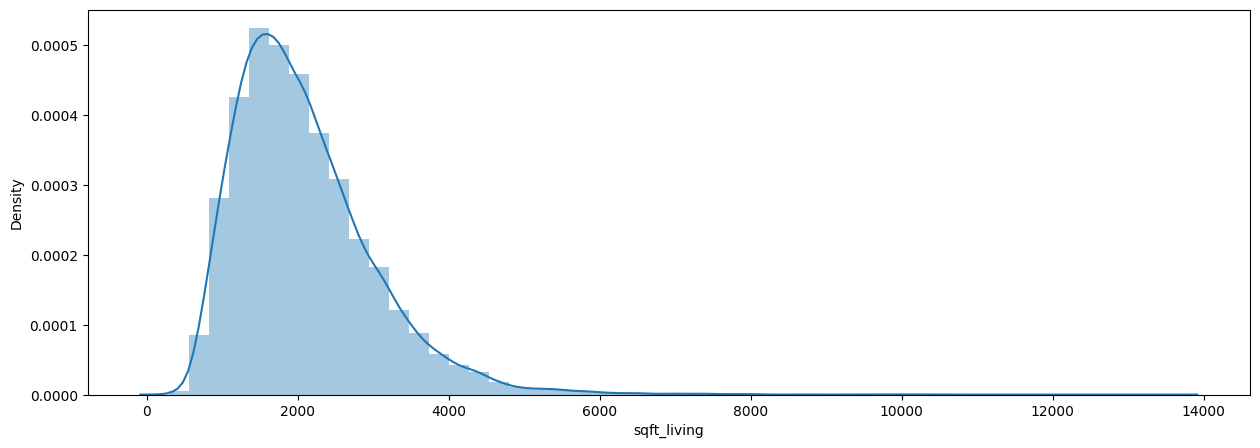

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['sqft_living'])

/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_1168/3048279456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

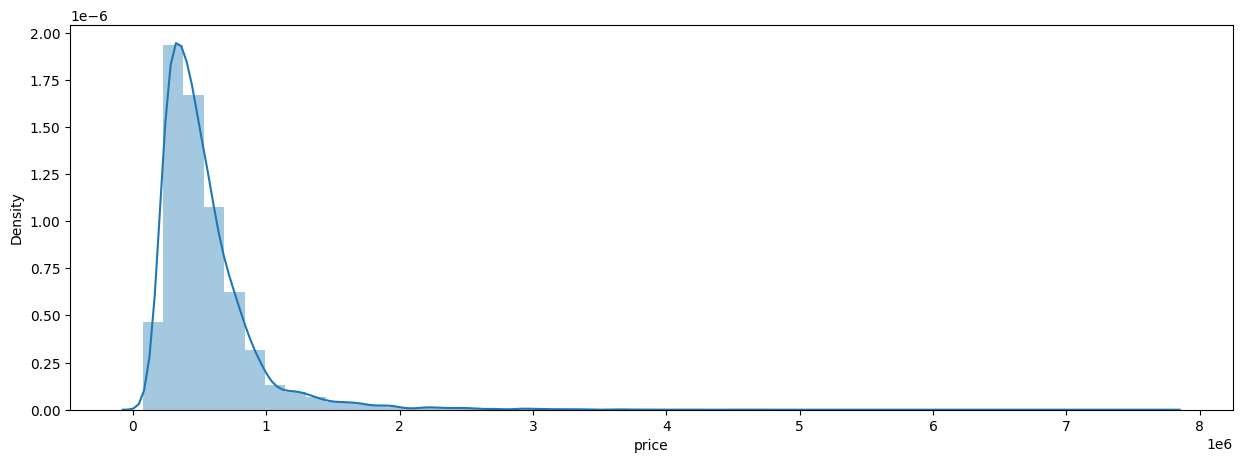

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])


-Ini memungkinkan untuk menjelajahi label yang sangat berkorelasi dengan harga.


-sqft_living tampak seperti label yang sangat berkorelasi dengan harga, serta kelas, sqft_above, sqft_living15, dan kamar mandi.

In [ ]:
price_corr = df.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


## Data preparation

Pada tahapan ini, Data preparation atau persiapan data adalah proses mempersiapkan data mentah (raw data) sebelum diolah lebih lanjut dengan menggunakan algoritma atau teknik tertentu. Tujuan dari data preparation adalah untuk memastikan data yang akan diolah sudah bersih, terstruktur dengan baik, dan siap untuk digunakan.

x = [features] (Independen)
y = ['price']  (Dependen)
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15'] 

Menggunakan Features 17 Variabel X, 
Menggunakan Target 1 Variabel Y

Proses persiapan data yang baik dan benar sangat penting dalam keberhasilan suatu proyek analisis data. Hal ini dapat membantu menghindari kesalahan analisis dan menghasilkan hasil yang lebih akurat dan bermakna.




In [ ]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15'] 
x = df[features]
y = df['price']
x.shape, y.shape

((21613, 17), (21613,))

sklearn.model_selection adalah sebuah modul dalam library scikit-learn yang menyediakan fungsi-fungsi untuk melakukan pemisahan data (train-test split), validasi silang (cross-validation), dan pemilihan parameter (parameter tuning) pada suatu model machine learning.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(5404,)

In [ ]:
print(x)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21608         3       2.50         1530      1131     3.0           0     0   
21609         4       2.50         2310      5813     2.0           0     0   
21610         2       0.75         1020      1350     2.0           0     0   
21611         3       2.50         1600      2388     2.0           0     0   
21612         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement 

In [ ]:
print(y)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


# Modeling


Pada tahapan ini, merupakan tahap pengembangan model machine learning. Tahap ini melibatkan pemilihan algoritma, konfigurasi parameter, dan pembuatan model.

tahap penting dalam membangun model machine learning. Pada tahap ini, kita melakukan pemilihan algoritma dan konfigurasi parameter yang sesuai dengan tujuan bisnis dan data yang digunakan. Setelah model dibangun, kita akan mengevaluasi performa model dan menentukan apakah model tersebut cukup baik untuk diterapkan di dalam produksi (Deployment).

from sklearn.linear_model import LinearRegression: memuat class LinearRegression dari modul linear_model pada library scikit-learn.

lr = LinearRegression(): membuat objek model regresi linier dengan menggunakan class LinearRegression.

lr.fit(x_train, y_train): melatih model regresi linier dengan menggunakan data x_train sebagai fitur (variabel independen) dan y_train sebagai target (variabel dependen).

pred = lr.predict(X_test): melakukan prediksi nilai target (y) dengan menggunakan model yang telah dilatih (lr) dan data fitur yang baru (X_test).


Dalam implementasi regresi linier menggunakan library scikit-learn, langkah-langkah yang dilakukan biasanya meliputi pemisahan data menjadi data latih dan data uji (train_test_split), melakukan normalisasi data (jika diperlukan), membangun model regresi linier (LinearRegression), melatih model dengan data latih (fit), mengevaluasi performa model pada data uji, dan melakukan prediksi pada data baru (predict).

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

# Evaluasi

Pada tahapan ini, bertujuan untuk mengevaluasi performa model machine learning yang telah dibangun dengan menggunakan metrik-metrik evaluasi yang sesuai. Tahap ini sangat penting untuk menentukan apakah model yang telah dibangun sudah cukup baik untuk diterapkan di dalam produksi atau tidak.

Penjelasan kode tersebut adalah sebagai berikut:

score = lr.score(X_test, y_test): menghitung skor akurasi dari model regresi linier yang telah dibangun dengan menggunakan data X_test sebagai fitur (variabel independen) dan y_test sebagai target (variabel dependen).

print('akurasi model regresi linier = ', score): mencetak nilai akurasi model regresi linier yang telah dihitung dengan menggunakan lr.score.


Skor akurasi (atau juga disebut dengan R-squared) mengindikasikan seberapa baik model dapat menjelaskan variasi data. Skor akurasi berkisar antara 0 dan 1, dan semakin dekat ke 1, semakin baik performa model. Pada kasus ini, jika skor akurasi model regresi linear bernilai 0.7045531699046454, artinya model dapat menjelaskan 70% dari variasi data.

In [ ]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.7045531699046454


In [ ]:

input_data = np.array([[3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650]])

prediction = lr.predict(input_data)
print('Estimasi harga rumah dalam EUR :', prediction)

Estimasi harga rumah dalam EUR : [261056.75043713]


/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [ ]:
import pickle

filename = 'estimasi_rumah.sav'
pickle.dump(lr,open(filename,'wb'))

# Deployment

Pada tahapan ini, melakukan deployment pengetahuan atau informasi yang telah akan diatur dan dipresentasikan menggunakan Streamlit. 
Streamlit adalah sebuah framework berbasis Python dan bersifat open-source yang dibuat untuk memudahkan dalam membangun aplikasi web di bidang sains data dan machine learning yang interaktif.
Berikut link Streamlit Share :
https://andyfaidan-estimasi-harga-rumah-main-6zzh09.streamlit.app/